## Insertar Librerias

In [ ]:
# Librerías básicas
import pandas as pd
import numpy as np
from google.colab import files

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Configuración visual
sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (8,5)

## Cargar dataset

In [ ]:
# Cargar dataset
cols = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
    'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
    'stalk-surface-below-ring', 'stalk-color-above-ring',
    'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
    'ring-type', 'spore-print-color', 'population', 'habitat'
]
uploaded = files.upload()

# Ruta de ejemplo en Colab; si lo subiste con el upload de Colab, estará en /content/
DATA_PATH = list(uploaded.keys())[0]
df = pd.read_csv(DATA_PATH, header=None, names=cols)
df.head()

Saving agaricus-lepiota.data to agaricus-lepiota (1).data


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Exploracion inicial

Tamaño del dataset: (8124, 23)

Valores nulos por columna:
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Valores únicos por columna:
class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment        

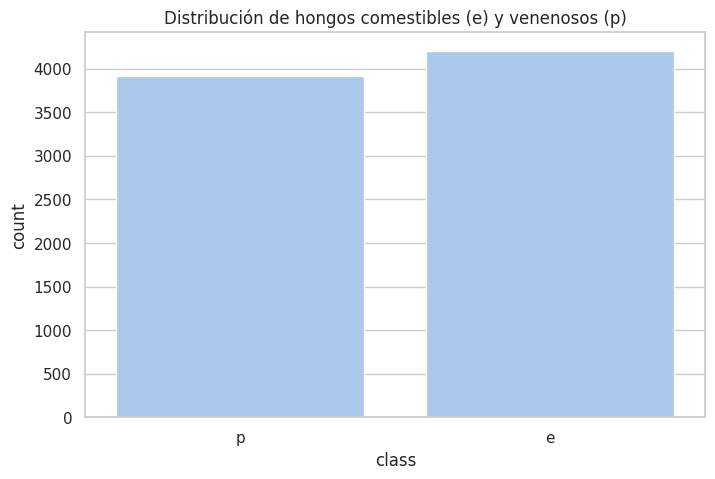

In [ ]:
# Tamaño del dataset
print("Tamaño del dataset:", df.shape)

# Valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Valores únicos
print("\nValores únicos por columna:")
print(df.nunique())

# Distribución de la clase objetivo
sns.countplot(x='class', data=df)
plt.title('Distribución de hongos comestibles (e) y venenosos (p)')
plt.show()

## Preprocesar los datos

In [ ]:
# Reemplazamos los valores faltantes representados por '?' en 'stalk-root'
df.replace('?', np.nan, inplace=True)
print(df.isnull().sum())

# Eliminamos filas con valores faltantes
df.dropna(inplace=True)

# Separamos la variable objetivo
X = df.drop('class', axis=1)
y = df['class']

# One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X)
X_encoded = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(X.columns))

print("Dimensiones tras OneHotEncoding:", X_encoded.shape)

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64
Dimensiones tras OneHotEncoding: (5644, 98)


## Reduccion de dimensionalidad

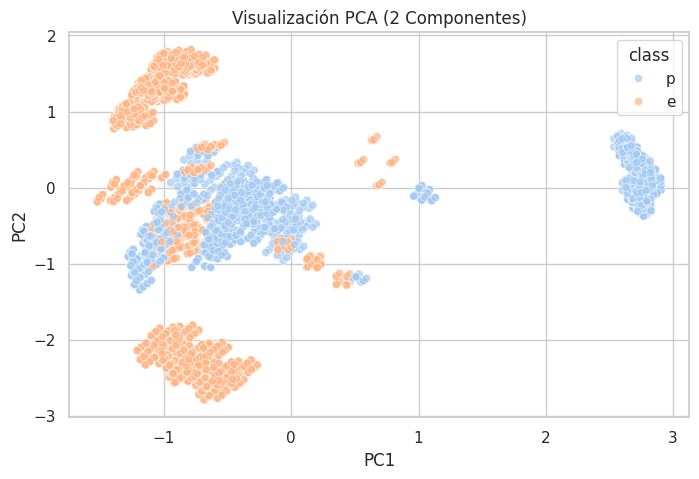

Varianza explicada por PCA: [0.22202824 0.13786022]


In [ ]:
# Reducimos a 2 componentes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_encoded)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['class'] = y.values

sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='class', alpha=0.7)
plt.title('Visualización PCA (2 Componentes)')
plt.show()

# Varianza explicada
print("Varianza explicada por PCA:", pca.explained_variance_ratio_)

## Clustering con K-means



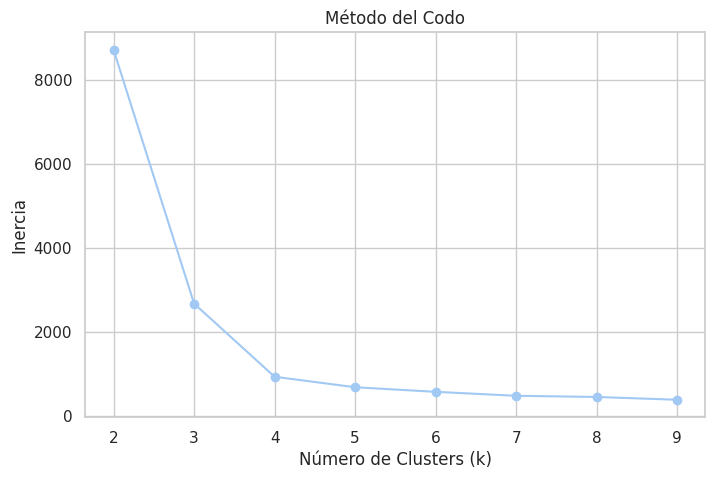

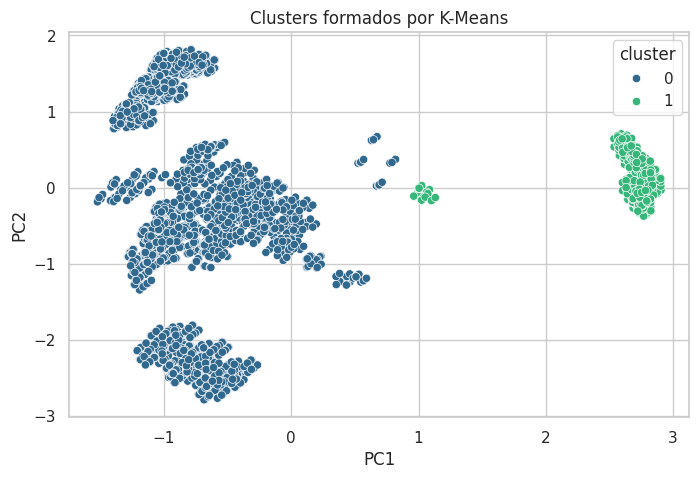

Correspondencia entre Clases y Clusters:
 cluster     0     1
class              
e        3488     0
p         824  1332


In [ ]:
# Método del codo
inertia = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

# Elegimos k=2 (porque sabemos que hay 2 clases)
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_pca)
pca_df['cluster'] = clusters

sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster', palette='viridis')
plt.title('Clusters formados por K-Means')
plt.show()

# Comparación entre clusters y clases reales
ct = pd.crosstab(pca_df['class'], pca_df['cluster'])
print("Correspondencia entre Clases y Clusters:\n", ct)


## Clasificacion supervisada y comparaciones

In [ ]:
# División train/test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predicción
y_pred = rf.predict(X_test)

# Evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Matriz de confusión:
 [[705   0]
 [  0 424]]

Reporte de clasificación:
               precision    recall  f1-score   support

           e       1.00      1.00      1.00       705
           p       1.00      1.00      1.00       424

    accuracy                           1.00      1129
   macro avg       1.00      1.00      1.00      1129
weighted avg       1.00      1.00      1.00      1129



## Conclusiones

PCA permitió visualizar claramente dos grupos separados.
K-Means detectó correctamente estructuras similares a las clases reales.
Random Forest logró una alta precisión, demostrando la separabilidad del dataset.
Este ejercicio muestra cómo los métodos no supervisados (PCA + KMeans) pueden revelar patrones
   sin necesidad de conocer las etiquetas, y cómo un modelo supervisado (RandomForest)
   puede confirmar esa separabilidad de manera cuantitativa.